In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Adım 1: Veri setini yükleme
uploaded = files.upload()
df = pd.read_csv(list(uploaded.keys())[0])


Saving Steel_industry_data.csv to Steel_industry_data (2).csv


Enerji Tüketim Tablosu (İlk 10 Satır):
                  date  Usage_kWh
95 2018-01-01 00:00:00       3.42
0  2018-01-01 00:15:00       3.17
1  2018-01-01 00:30:00       4.00
2  2018-01-01 00:45:00       3.24
3  2018-01-01 01:00:00       3.31
4  2018-01-01 01:15:00       3.82
5  2018-01-01 01:30:00       3.28
6  2018-01-01 01:45:00       3.60
7  2018-01-01 02:00:00       3.60
8  2018-01-01 02:15:00       3.28


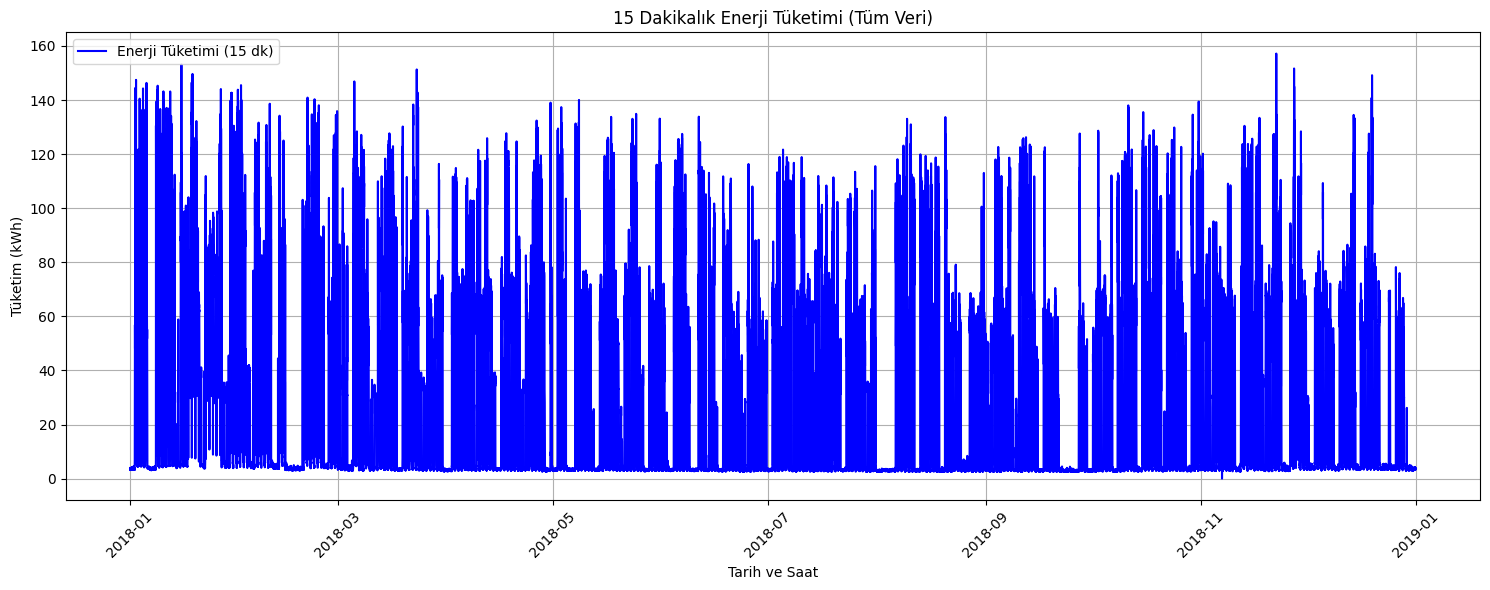

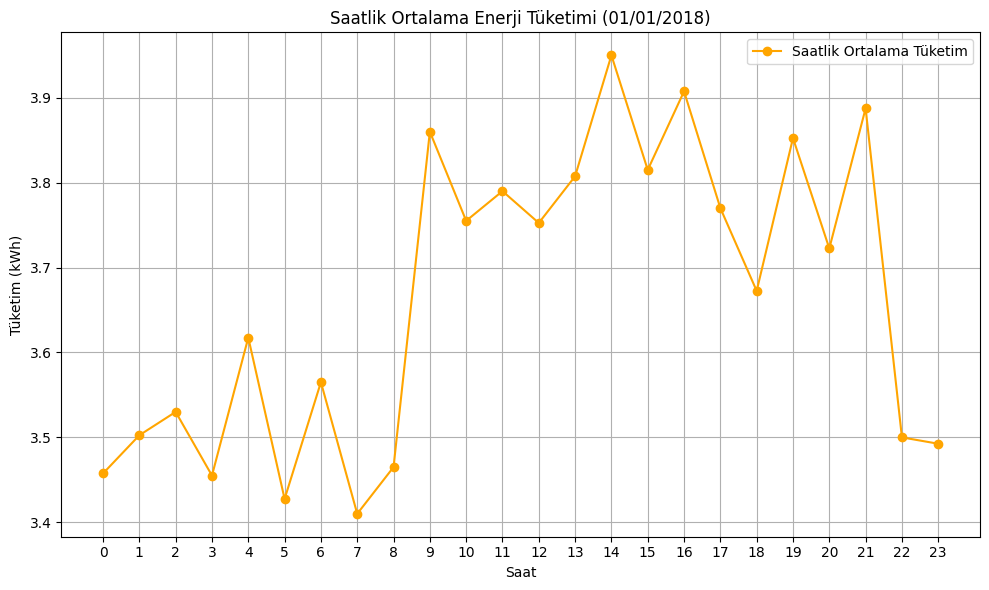

In [12]:

# Adım 2: Tarih-saat sütununu datetime formatına çevirme ve sıralama
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
df = df.sort_values('date')

# Adım 3: Enerji tüketim tablosunu oluşturma (ham veri)
print("Enerji Tüketim Tablosu (İlk 10 Satır):")
print(df[['date', 'Usage_kWh']].head(10))

# Adım 4: 15 dakikalık enerji tüketim grafiği (tüm veri)
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['Usage_kWh'], label='Enerji Tüketimi (15 dk)', color='blue')
plt.xlabel('Tarih ve Saat')
plt.ylabel('Tüketim (kWh)')
plt.title('15 Dakikalık Enerji Tüketimi (Tüm Veri)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Adım 5: Saatlik ortalama enerji tüketimi (örnek bir gün için)
# Örnek olarak ilk tam günü alalım (01/01/2018)
#sample_day = df[df['date'].dt.date == pd.to_datetime('01/01/2018').date()]
#hourly_avg = sample_day.groupby(sample_day['date'].dt.hour)['Usage_kWh'].mean()

# Saatlik ortalama grafiği
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg.values, label='Saatlik Ortalama Tüketim', color='orange', marker='o')
plt.xlabel('Saat')
plt.ylabel('Tüketim (kWh)')
plt.title('Saatlik Ortalama Enerji Tüketimi (01/01/2018)')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35040 entries, 95 to 35038
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10  Lo

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

In [19]:
df['date'] = pd.to_datetime(df['date'], format = "%d/%m/%Y %H:%M")
df


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
95,2018-01-01 00:00:00,3.42,3.46,0.00,0.0,70.30,100.00,0,Weekday,Monday,Light_Load
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35034,2018-12-31 22:45:00,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday,Light_Load
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35040 entries, 95 to 35038
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10  Lo

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.isna().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


In [23]:
le = LabelEncoder()

In [24]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

In [25]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
95,2018-01-01 00:00:00,3.42,3.46,0.00,0.0,70.30,100.00,0,0,1,0
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,0,1,0
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,1,0
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,1,0
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
35034,2018-12-31 22:45:00,3.82,4.54,0.00,0.0,64.38,100.00,81900,0,1,0
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,1,0
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1,0
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1,0


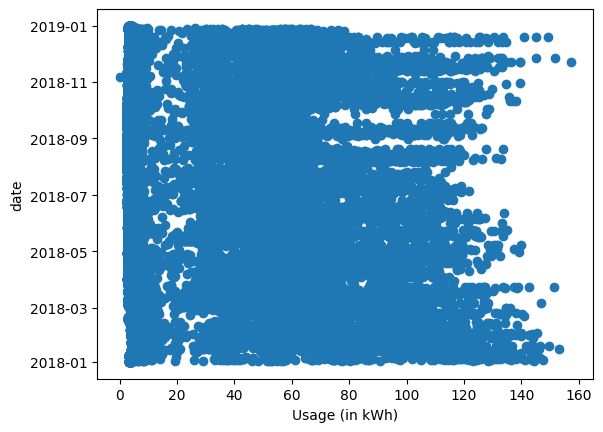

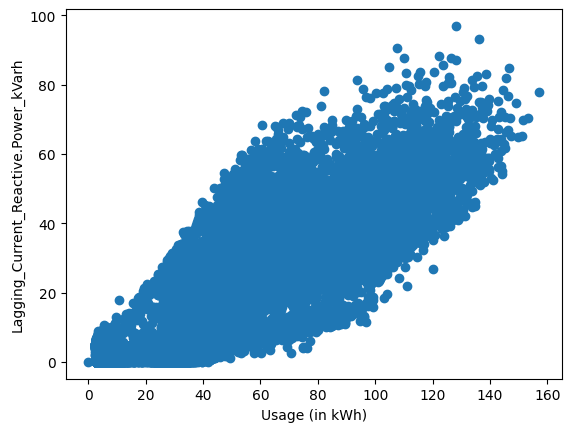

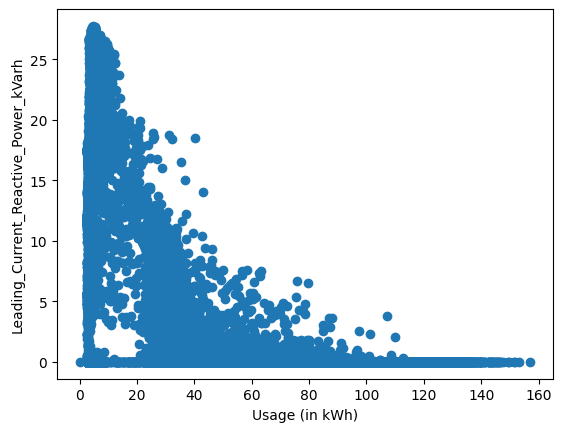

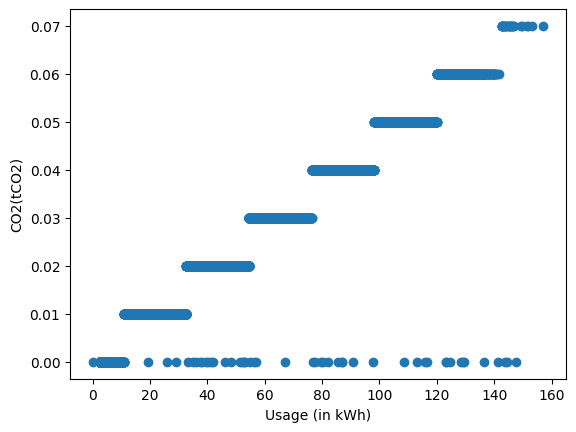

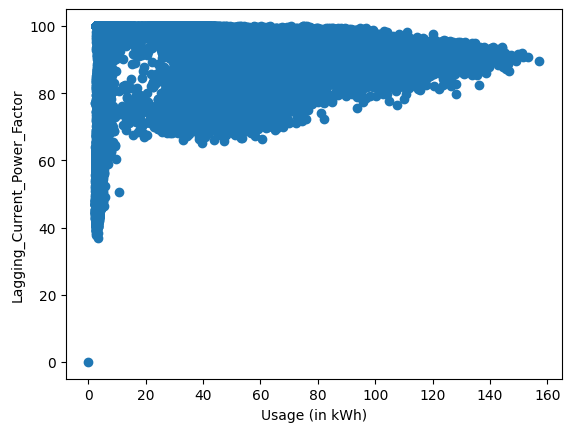

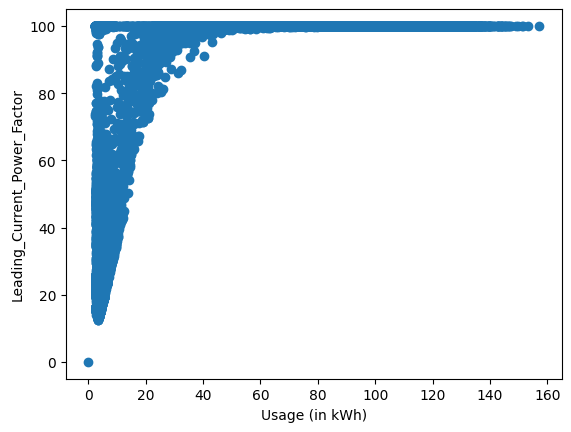

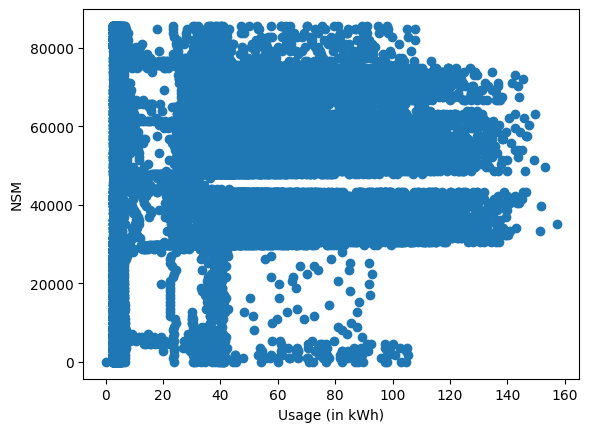

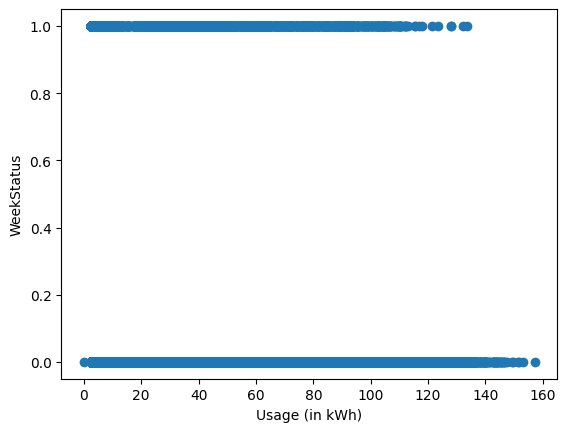

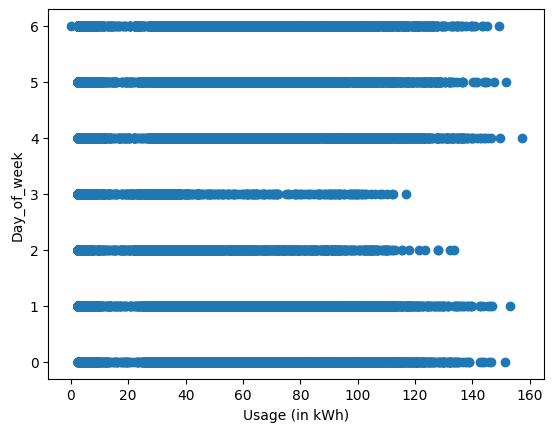

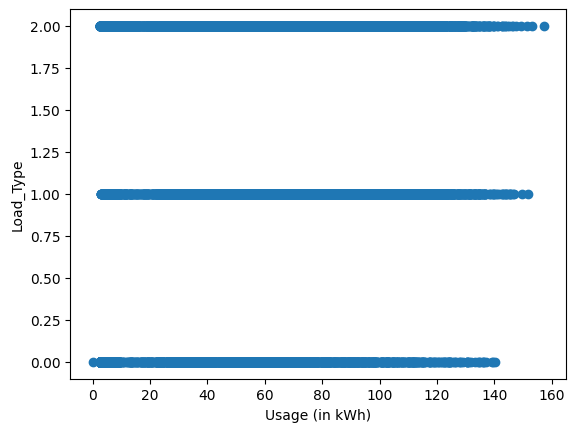

In [26]:
for i in df.columns:
    if i != 'Usage_kWh':
        plt.scatter(x = df['Usage_kWh'], y = df[i])
        plt.xlabel('Usage (in kWh)')
        plt.ylabel(i)
        plt.show()

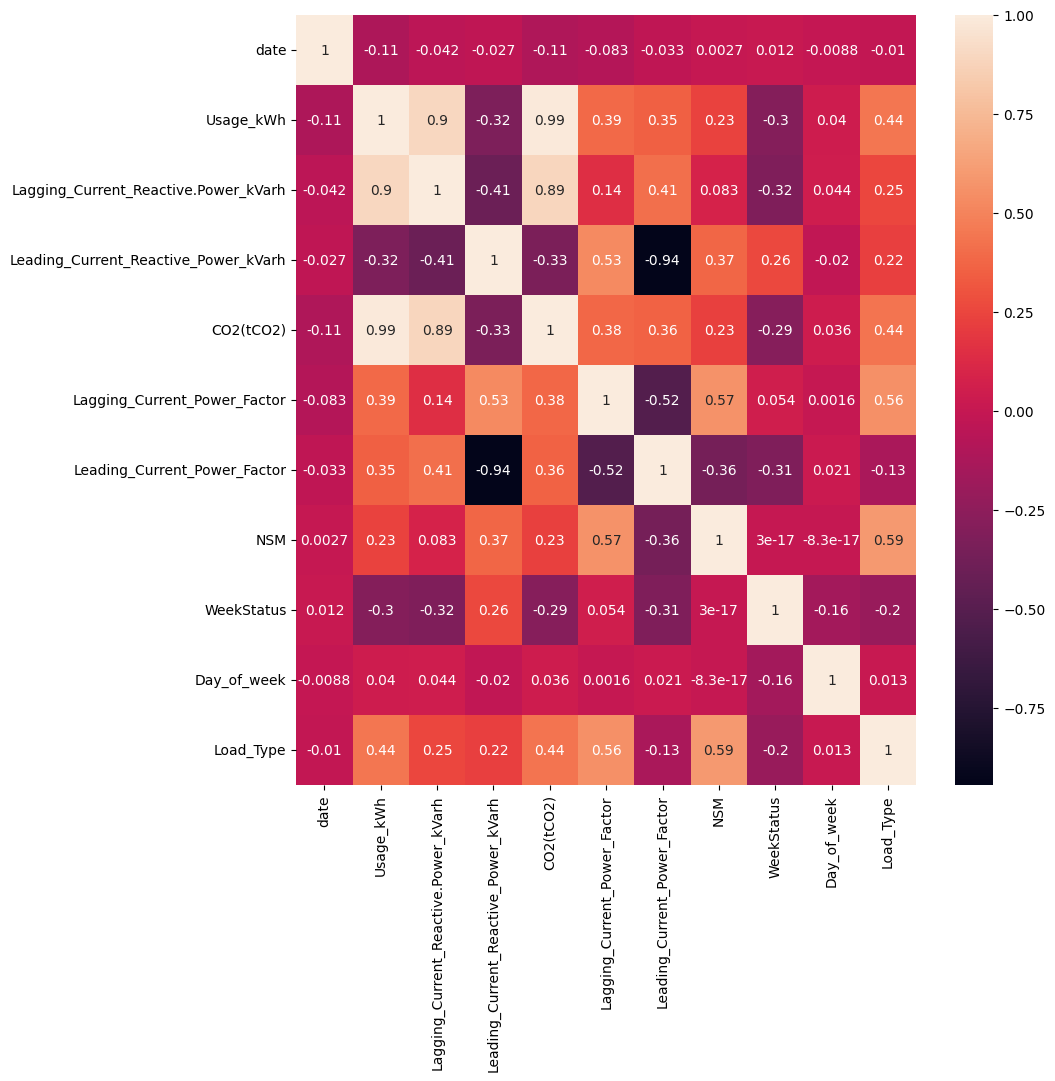

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, color = 'red')
plt.show()

In [28]:
df = df.drop(['date'], axis = 1)


data split

In [29]:
x = df.drop(['Usage_kWh'], axis = 1)
y = df['Usage_kWh']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=10)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26280, 9)
(8760, 9)
(26280,)
(8760,)




---Feature Selection and Model Building



In [32]:
model = DecisionTreeRegressor(random_state = 10, max_depth= 5)

In [33]:
rfe = RFE(model,n_features_to_select=6)
rfe.fit(x,y)

RFE(estimator=DecisionTreeRegressor(max_depth=5, random_state=10),
    n_features_to_select=6)

In [34]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True])

In [35]:
rfe_df = pd.DataFrame()
rfe_df['Features'] = x.columns
rfe_df['Support'] = rfe.support_
rfe_df['Ranking'] = rfe.ranking_
rfe_df

,Features,Support,Ranking
0,Lagging_Current_Reactive.Power_kVarh,True,1
1,Leading_Current_Reactive_Power_kVarh,False,2
2,CO2(tCO2),True,1
3,Lagging_Current_Power_Factor,True,1
4,Leading_Current_Power_Factor,True,1
5,NSM,True,1
6,WeekStatus,False,4
7,Day_of_week,False,3
8,Load_Type,True,1


In [36]:
col = x.columns[rfe_df['Support']==True]
col

Index(['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type'],
      dtype='object')

In [37]:
x_train = x_train[col]
x_test = x_test[col]
print(x_train.shape)
print(x_test.shape)

(26280, 6)
(8760, 6)


In [38]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [39]:
y_pred = model.predict(x_test)


Measuring Model Performance

In [42]:
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

MAE: 2.2248961691700053
MSE: 13.93505253887919
RMSE: 3.732968328137702
0.9874502212839074
